In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
x = np.arange(0, 5, 0.01)
y_1 = 100*np.exp(-x**2/(2*0.4))
y_2 = 100*np.exp(-x**2/(2*1.3))
y_3 = 100*np.exp(-x**2/(2*0.06))

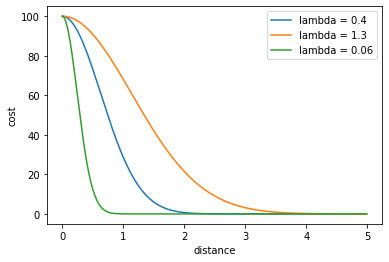

In [38]:
plt.plot(x, y_1, label='lambda = 0.4')
plt.plot(x, y_2, label='lambda = 1.3')
plt.plot(x, y_3, label='lambda = 0.06')
plt.xlabel('distance')
plt.ylabel('cost')
plt.legend()

In [90]:
x = np.arange(0.1, 3.0, 0.01)
# epsilon = 0.1
y_1 = -1 + 5/((x-0.4)**2) # cov = 0.5*1
y_1[y_1 > 100] = 100.0
y_1[:40] = 100.0

y_2 = -1 + 1/((x-0.4)**2) # cov = 0.1
y_2[y_2 > 100] = 100.0
y_2[:40] = 100.0

y_3 = -1 + 0.1/((x-0.4)**2) # cov = 0.01
y_3[y_3 > 100] = 100.0
y_3[:40] = 100.0

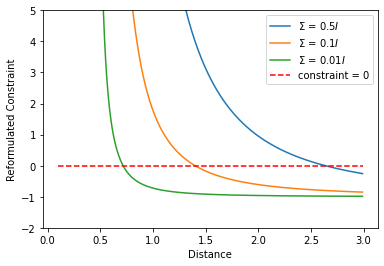

In [93]:
plt.plot(x, y_1, label= r"$\Sigma$" + ' = 0.5' + r"$I$")
plt.plot(x, y_2, label= r"$\Sigma$" + ' = 0.1' + r"$I$")
plt.plot(x, y_3, label= r"$\Sigma$" + ' = 0.01' + r"$I$")
plt.plot(x, np.zeros_like(x), '--', color='red', label='constraint = 0')
plt.ylim(-2, 5)
plt.xlabel('Distance')
plt.ylabel('Reformulated Constraint')

plt.legend()

In [84]:
x = np.arange(0.2, 3.0, 0.01)
# cov = 0.1
y_1 = -1 + 2/((x-0.4)**2) # epsilon = 0.05
y_1[y_1 > 100] = 100.0
y_1[:40] = 100.0

y_2 = -1 + 1/((x-0.4)**2) # epsilon = 0.1
y_2[y_2 > 100] = 100.0
y_2[:40] = 100.0

y_3 = -1 + (0.1/0.15)/((x-0.4)**2) # epsilon = 0.15
y_3[y_3 > 100] = 100.0
y_3[:40] = 100.0

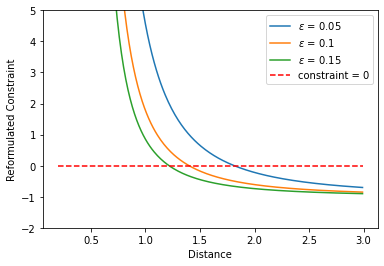

In [85]:
plt.plot(x, y_1, label=r"$\epsilon$" + ' = 0.05')
plt.plot(x, y_2, label=r"$\epsilon$" + ' = 0.1')
plt.plot(x, y_3, label=r"$\epsilon$" + ' = 0.15')
plt.plot(x, np.zeros_like(x), '--', color='red', label='constraint = 0')
plt.ylim(-2, 5)
plt.xlabel('Distance')
plt.ylabel('Reformulated Constraint')

plt.legend()

In [4]:
# multimodal synthetic
# initial_collision = [3, 27, 51, 149, 187, 203, 220, 266, 270, 288, 295] #, 318, 340, 351, 396, 417, 464, 495]

# for trajectron (ETH)
# initial_collision = [34, 169, 230] #, 333, 378]

# removed trajectron
# initial_collision = [34, 230, 333, 378]

# Hotel
initial_collision = [10, 13, 60, 187, 202, 224, 262] #, 360, 382]

initial_collision = np.array(initial_collision) - 1

In [8]:
rssac_result_0 = pd.read_csv('./trajectron_rssac_100_05.csv')
rssac_result_1 = pd.read_csv('../../experiments/hotel/rssac/risk_1/trajectron_rssac_300.csv')

rssac_result_0['collision'] = rssac_result_0['collision']/5
rssac_result_1['collision'] = rssac_result_1['collision']/5
# rssac_result_2['collision'] = rssac_result_2['collision']/5

drc_result_0 = pd.read_csv('../../experiments/hotel/hard_constraint/epsilon_005/trajectron_drc_300.csv')
drc_result_1 = pd.read_csv('../../experiments/hotel/hard_constraint/epsilon_01/trajectron_drc_300.csv')
drc_result_2 = pd.read_csv('../../experiments/hotel/hard_constraint/epsilon_015/trajectron_drc_300.csv')
# drc_result_3 = pd.read_csv('./trajectron_drc_0.01_100.csv')

In [9]:
# rssac_result_0 = rssac_result_0.drop(initial_collision)
rssac_result_1 = rssac_result_1.drop(initial_collision)

drc_result_0 = drc_result_0.drop(initial_collision)
drc_result_1 = drc_result_1.drop(initial_collision)
drc_result_2 = drc_result_2.drop(initial_collision)
# drc_result_3 = drc_result_3.drop(initial_collision)

In [10]:
rssac_result_0.mean(axis=0)

collision         0.000000
position_cost    90.301998
control_cost      2.995162
minimum_dist      1.140832
dtype: float64

In [11]:
rssac_result_0.std(axis=0)

collision         0.000000
position_cost    12.726774
control_cost      0.225417
minimum_dist      0.101418
dtype: float64

In [27]:
len(rssac_result_0[rssac_result_0['collision'] == 0]) / len(rssac_result_0['collision'])

0.9931740614334471

In [28]:
rssac_result_1.mean(axis=0)

collision          0.040273
position_cost    121.167146
control_cost       2.798236
minimum_dist       0.964474
dtype: float64

In [29]:
rssac_result_1.std(axis=0)

collision         0.268716
position_cost    68.784107
control_cost      0.349184
minimum_dist      0.235076
dtype: float64

In [30]:
len(rssac_result_1[rssac_result_1['collision'] == 0]) / len(rssac_result_1['collision'])

0.9726962457337884

In [31]:
drc_result_0.mean(axis=0)

collision          0.000000
position_cost    239.683844
control_cost       1.223003
minimum_dist       0.716616
dtype: float64

In [32]:
drc_result_0.std(axis=0)

collision          0.000000
position_cost    142.206657
control_cost       0.195849
minimum_dist       0.187447
dtype: float64

In [33]:
len(drc_result_0[drc_result_0['collision'] == 0]) / len(drc_result_0['collision'])

1.0

In [34]:
drc_result_1.mean(axis=0)

collision          0.010239
position_cost    198.839186
control_cost       1.164326
minimum_dist       0.570610
dtype: float64

In [35]:
drc_result_1.std(axis=0)

collision          0.100840
position_cost    122.796251
control_cost       0.224586
minimum_dist       0.086945
dtype: float64

In [36]:
len(drc_result_1[drc_result_1['collision'] == 0]) / len(drc_result_1['collision'])

0.9897610921501706

In [37]:
drc_result_2.mean(axis=0)

collision          0.006826
position_cost    184.893133
control_cost       1.137118
minimum_dist       0.531183
dtype: float64

In [38]:
drc_result_2.std(axis=0)

collision          0.082478
position_cost    116.673074
control_cost       0.231806
minimum_dist       0.080890
dtype: float64

In [39]:
len(drc_result_2[drc_result_2['collision'] == 0]) / len(drc_result_2['collision'])

0.9931740614334471

In [40]:
# drc_max_collision = drc_result['collision'].max()
# rssac_max_collision = rssac_result['collision'].max()
# drc_cem_max_collision = drc_cem_result['collision'].max()

In [41]:
# drc_result.hist(column='collision', bins=drc_max_collision)

In [42]:
# rssac_result.hist(column='collision', bins=4)